# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [31]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [32]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

In [33]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 20 columns):
Name              18207 non-null object
Age               18207 non-null int64
Nationality       18207 non-null object
Overall           18207 non-null int64
Potential         18207 non-null int64
Club              17966 non-null object
Value             18207 non-null object
Preferred Foot    18159 non-null object
Position          18147 non-null object
Weak Foot         18159 non-null float64
Acceleration      18159 non-null float64
SprintSpeed       18159 non-null float64
Stamina           18159 non-null float64
Strength          18159 non-null float64
LongShots         18159 non-null float64
Aggression        18159 non-null float64
Interceptions     18159 non-null float64
Positioning       18159 non-null float64
Vision            18159 non-null float64
Penalties         18159 non-null float64
dtypes: float64(11), int64(3), object(6)
memory usage: 2.8+ MB


Let's examine the dataset by looking at the `head`.

In [34]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [35]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.replace('[^0-9,.]','').astype('float64')
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


In [36]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
Name              18207 non-null object
Age               18207 non-null int64
Nationality       18207 non-null object
Overall           18207 non-null int64
Potential         18207 non-null int64
Club              17966 non-null object
Value             18207 non-null object
Preferred Foot    18159 non-null object
Position          18147 non-null object
Weak Foot         18159 non-null float64
Acceleration      18159 non-null float64
SprintSpeed       18159 non-null float64
Stamina           18159 non-null float64
Strength          18159 non-null float64
LongShots         18159 non-null float64
Aggression        18159 non-null float64
Interceptions     18159 non-null float64
Positioning       18159 non-null float64
Vision            18159 non-null float64
Penalties         18159 non-null float64
ValueNumeric      18207 non-null float64
dtypes: float64(12), int64(3), object(6)
m

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [37]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
model = ols('fifa.ValueNumeric ~ C(fifa["Position"]) + C(fifa["Preferred Foot"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",8.767522e+06,26.0,4.031426,2.192419e-11
"C(fifa[""Preferred Foot""])",7.292211e+04,1.0,0.871795,3.504713e-01
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [39]:
# Your conclusions here:
#Preferred foot doesnt has real impact on player value
#Position has impact



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [40]:
# Your code here:
model = ols('fifa.ValueNumeric ~ C(fifa["Nationality"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [41]:
#Nationality seems that dont have a real impact. PR(>F) is lower than alpha

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [42]:
# Your code here:
fifa = fifa.dropna(how='any',axis=0) 
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
Name              17918 non-null object
Age               17918 non-null int64
Nationality       17918 non-null object
Overall           17918 non-null int64
Potential         17918 non-null int64
Club              17918 non-null object
Value             17918 non-null object
Preferred Foot    17918 non-null object
Position          17918 non-null object
Weak Foot         17918 non-null float64
Acceleration      17918 non-null float64
SprintSpeed       17918 non-null float64
Stamina           17918 non-null float64
Strength          17918 non-null float64
LongShots         17918 non-null float64
Aggression        17918 non-null float64
Interceptions     17918 non-null float64
Positioning       17918 non-null float64
Vision            17918 non-null float64
Penalties         17918 non-null float64
ValueNumeric      17918 non-null float64
dtypes: float64(12), int64(3), object(6)
m

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [43]:
# Your code here:
# remember to add an intercept to the model using the add_constant function.
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Thu, 26 Mar 2020   Prob (F-statistic):             0.0116
Time:                        20:16:07   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [44]:
# Your conclusions here:

#we dont have a clear correlation 

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [45]:
# Your code here:
X = sm.add_constant(fifa.Potential)
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          9.15e-225
Time:                        20:16:07   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [46]:
# Your conclusions here:
# low correlation??


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

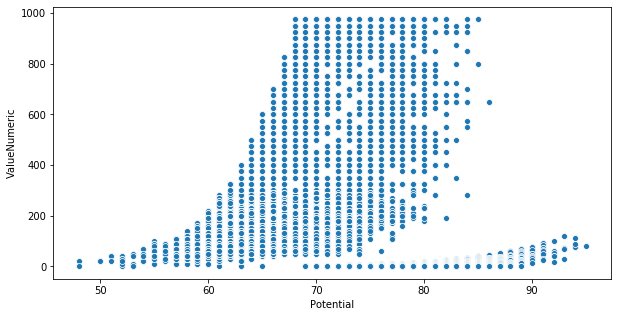

In [47]:
# Your code here:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.scatterplot(x="Potential",y="ValueNumeric",data=fifa)
plt.show()


In [48]:
#We dont have a relationship between these two parameters.
#Low correlation